# Assignment 2

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./05_src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model]() or a linear model like [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) or [Ridge Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html).
        - An advanced regressor of your choice (e.g., Bagging, Boosting, SVR, etc.). TIP: select a tree-based method such that it does not take too long to run SHAP further below. 

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Place the files in the ../../05_src/data/fires/ directory and load the appropriate file. 

In [1]:
import os
import shutil

source_dir = os.path.expanduser("~/Downloads/forest+fires")
files_to_move = ["forestfires.csv", "forestfires.names"]

# Setting destination directory
destination_dir = os.path.expanduser("~/DSI_Projects/production/05_src/data/fires")
os.makedirs(destination_dir, exist_ok=True)

# Moving files
for file_name in files_to_move:
    source_path = os.path.join(source_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)
    
     if os.path.exists(source_path):
        shutil.move(source_path, destination_path)
        print(f"Moved {file_name} successfully!")
    else:
        print(f"Warning: {file_name} not found in {source_dir}.")

# Verifying files are in the right location
for file_name in files_to_move:
    final_path = os.path.join(destination_dir, file_name)
    if os.path.exists(final_path):
        print(f"{file_name} is correctly placed in {destination_dir}")
    else:
        print(f"Error: {file_name} is missing in {destination_dir}")

Moved forestfires.csv successfully!
Moved forestfires.names successfully!
forestfires.csv is correctly placed in C:\Users\zarya/DSI_Projects/production/05_src/data/fires
forestfires.names is correctly placed in C:\Users\zarya/DSI_Projects/production/05_src/data/fires


In [2]:
# Load the libraries as required.

import pandas as pd

In [3]:
# Load data
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]

fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))
fires_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Get X and Y

Create the features data frame and target data.

In [20]:
from sklearn.model_selection import train_test_split

X = fires_dt.drop(columns=['area'])  # Features (all columns except the target)
Y = fires_dt['area']  # Target variable (area burned)

print(f"Shape of X (features): {X.shape}")
print(f"Shape of Y (target): {Y.shape}")

Shape of X (features): (517, 12)
Shape of Y (target): (517,)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training set shape: X_train: (413, 12), Y_train: (413,)
Test set shape: X_test: (104, 12), Y_test: (104,)


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining categorical and numerical columns
num_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
cat_features = ['month', 'day']

# Preproc1: StandardScaler + One-Hot Encoding
preproc1 = ColumnTransformer([
    ('num_scaler', StandardScaler(), num_features),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'), cat_features)
])


### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

# Defining categorical and numerical columns
num_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
cat_features = ['month', 'day']

nonlinear_features = ['isi', 'temp']

# Creating preproc2:
nonlinear_features = ['isi', 'temp']
preproc2 = ColumnTransformer([
    ('num_scaler', StandardScaler(), [f for f in num_features if f not in nonlinear_features]),
    ('num_nonlinear', PowerTransformer(method='yeo-johnson'), nonlinear_features),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'), cat_features)
])


# Checking for confirmation
print("Preprocessors updated to use X_train and X_test.")


Preprocessors updated to use X_train and X_test.


## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [24]:
# Pipeline A = preproc1 + baseline
knn_regressor = KNeighborsRegressor()

pipeline_A = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', knn_regressor) 
])

# Cross-validation
cv_scores_A = cross_val_score(pipeline_A, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Pipeline A MAE: {np.mean(cv_scores_A):.4f}")

Pipeline A MAE: -17.4077


In [26]:
# Pipeline B = preproc2 + baseline
pipeline_B = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', knn_regressor)
])

# Cross-validation
cv_scores_B = cross_val_score(pipeline_B, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Pipeline B MAE: {np.mean(cv_scores_B):.4f}")

Pipeline B MAE: -17.2349


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Pipeline C = preproc1 + Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline_C = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', rf_regressor)
])

# Cross-validation
cv_scores_C = cross_val_score(pipeline_C, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Pipeline C MAE: {np.mean(cv_scores_C):.4f}")

Pipeline C MAE: -20.1858


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Pipeline D = preproc2 + Gradient Boost
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

pipeline_D = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', gb_regressor)
])

# Cross-validation
cv_scores_D = cross_val_score(pipeline_D, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Pipeline D MAE: {np.mean(cv_scores_D):.4f}")

Pipeline D MAE: -22.0144


# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [13]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

In [29]:
#Pipeline A:
param_grid_A = {
    'regressor__n_neighbors': [3, 5, 7, 9]
}

grid_A = GridSearchCV(pipeline_A, param_grid_A, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_A.fit(X_train, Y_train)

print(f"Best params for Pipeline A: {grid_A.best_params_}")
print(f"Best MAE for Pipeline A: {-grid_A.best_score_:.4f}")

Best params for Pipeline A: {'regressor__n_neighbors': 9}
Best MAE for Pipeline A: 16.5740


In [30]:
#Pipeline B: 
param_grid_B = {
    'regressor__n_neighbors': [3, 5, 7, 9]
}

grid_B = GridSearchCV(pipeline_B, param_grid_B, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_B.fit(X_train, Y_train)

print(f"Best params for Pipeline B: {grid_B.best_params_}")
print(f"Best MAE for Pipeline B: {-grid_B.best_score_:.4f}")

Best params for Pipeline B: {'regressor__n_neighbors': 9}
Best MAE for Pipeline B: 16.6305


In [31]:
#Pipeline C:
param_grid_C = {
    'regressor__n_estimators': [50, 100, 200, 500]
}

grid_C = GridSearchCV(pipeline_C, param_grid_C, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_C.fit(X_train, Y_train)

print(f"Best params for Pipeline C: {grid_C.best_params_}")
print(f"Best MAE for Pipeline C: {-grid_C.best_score_:.4f}")

Best params for Pipeline C: {'regressor__n_estimators': 100}
Best MAE for Pipeline C: 20.1858


In [32]:
#Pipeline D:
param_grid_D = {
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2]
}

grid_D = GridSearchCV(pipeline_D, param_grid_D, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_D.fit(X_train, Y_train)

print(f"Best params for Pipeline D: {grid_D.best_params_}")
print(f"Best MAE for Pipeline D: {-grid_D.best_score_:.4f}")

Best params for Pipeline D: {'regressor__learning_rate': 0.01}
Best MAE for Pipeline D: 18.9907


# Evaluate

+ Which model has the best performance?

Pipeline A performed the best, with the lowest MAW of 16.5740. This indicates that it made the most accurate predictions compared to the other models tested. Interestingly, while Pipeline B also used KNN, the addition of non-linear transformations in preproc2 did not significantly improve performance, as its MAE was slightly higher.

# Export

+ Save the best performing model to a pickle file.

In [48]:
import pickle

best_model = grid_A.best_estimator_

with open("best_model_pipeline_A.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Best model saved successfully as 'best_model_pipeline_A.pkl'")

Best model saved successfully as 'best_model_pipeline_A.pkl'


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [49]:
import shap
import numpy as np

# Ensure SHAP values are properly structured
shap_values = np.array(shap_values)  # Convert to NumPy array if needed

# If `shap_values` is a list (e.g., for multi-output models), select the first output
if isinstance(shap_values, list):
    shap_values = shap_values[0]

# Ensure `base_values` are handled correctly
base_values = explainer.expected_value

# Convert to SHAP Explanation object
shap_explanation = shap.Explanation(
    values=shap_values,  # SHAP values
    base_values=base_values,  # Expected value for SHAP
    data=X_test_transformed,  # Transformed feature data
    feature_names=best_model_A.named_steps['preprocessing'].get_feature_names_out()
)

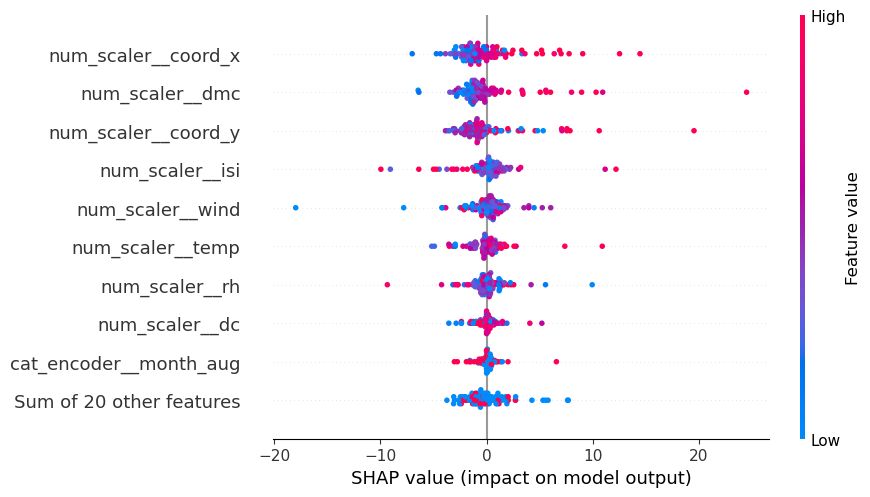

In [50]:
#Beeswarm plot
shap.plots.beeswarm(shap_explanation)

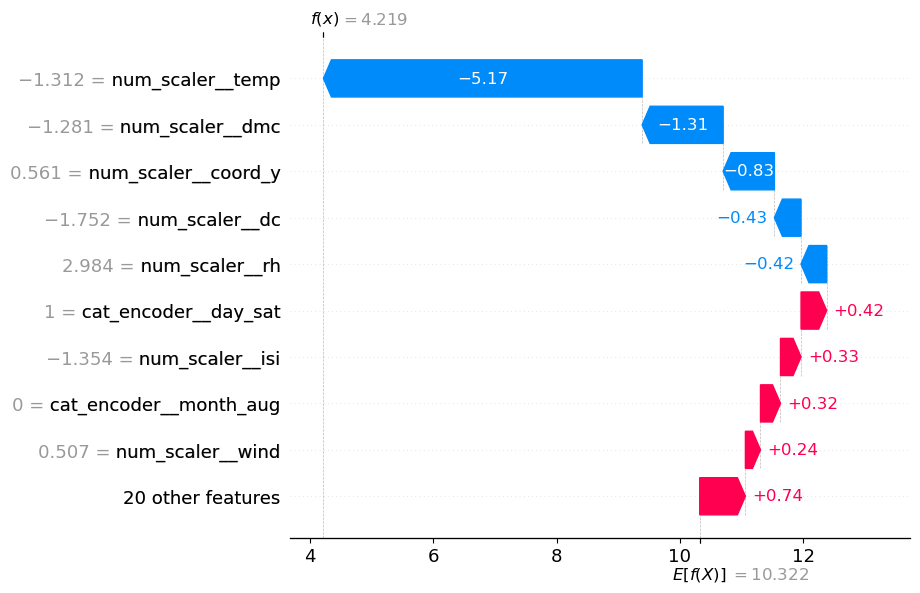

In [51]:
# Waterfall plot:
sample_index = 0
shap.plots.waterfall(shap_explanation[sample_index])

Using the beeswarm plot on Pipeline A, the most important features were location (X, Y coordinates), moisture levels (DMC, DC), wind speed, and fire spread index (ISI). Seasonality (August fires) had little effect, meaning fire size is influenced more by conditions than by the month.

Using the waterfall plot, the fire was predicted to be smaller than average (4.219 ha instead of 10.322 ha) mainly due to cooler temperatures and higher moisture levels (DMC, DC), which reduced fire spread. Wind speed and human activity (Saturday fires) slightly increased the prediction.

Based on these plots, month (e.g., August) and other low-impact features from the beeswarm plot could be removed since they don’t strongly influence predictions. To test this, we could retrain the model without them and check if performance stays the same or improves.

## Criteria

The [rubric](./assignment_2_rubric_clean.xlsx) contains the criteria for assessment.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at the `help` channel. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.